In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from operator import add
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data

## 1.1. load

In [ ]:
Data = pd.read_csv("/content/diabetes_prediction_dataset.csv")
Data = Data.dropna()
Data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 1.2. Preprocessing

### convert string to int

*   `gender` : [Female , Male, Other] -> [0, 1, 2]
*   `smoking_history` : [No Info , never , former , current , not current ] -> [0, 1, 2, 3, 4]

In [ ]:
gender = Data.loc[:, 'gender']
gender = gender.to_numpy()
smoking_history	 = Data.loc[:,'smoking_history']
smoking_history = smoking_history.to_numpy()

In [ ]:
print (gender.shape[0])
print (smoking_history.shape[0])

100000
100000


In [ ]:
for i in range (gender.shape[0]):
  if (gender[i] == 'Female'):
    gender[i] = 0
  elif (gender[i] == 'Male'):
    gender[i] = 1
  else: 
    gender[i] = 2

In [ ]:
for i in range (smoking_history.shape[0]):
  if (smoking_history[i] == 'No Info'):
    smoking_history[i] = 0
  elif (smoking_history[i] == 'never'):
    smoking_history[i] = 1
  elif (smoking_history[i] == 'former'):
    smoking_history[i] = 2
  elif (smoking_history[i] == 'current'):
    smoking_history[i] = 3
  else:
    smoking_history[i] = 4

In [ ]:
Data = Data.drop(['gender', 'smoking_history'], axis=1)
Data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [ ]:
Data.insert(0, 'gender',gender)
Data.insert(4, 'smoking_history', smoking_history)
Data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0


In [ ]:
Data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
Data['gender'] = pd.to_numeric(Data['gender'])
Data['smoking_history'] = pd.to_numeric(Data['smoking_history'])

### Normalize

In [ ]:
scaler = MinMaxScaler()

scaler.fit(Data)

normalized_df = pd.DataFrame(scaler.transform(Data), columns=Data.columns)

normalized_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.25,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.00,0.202031,0.563636,0.000000,0.0
2,0.5,0.349349,0.0,0.0,0.25,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.75,0.156863,0.272727,0.340909,0.0
4,0.5,0.949950,1.0,1.0,0.75,0.118231,0.236364,0.340909,0.0


### features and labels

In [ ]:
X = Data.drop('diabetes', axis = 1)
Y = Data['diabetes']

### convert to np

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

print("The shape of the features :", X.shape)
print("The shape of the labels :", Y.shape)

The shape of the features : (100000, 8)
The shape of the labels : (100000,)


## 1.3. Data visualization

### 1.3.1. heatmap 

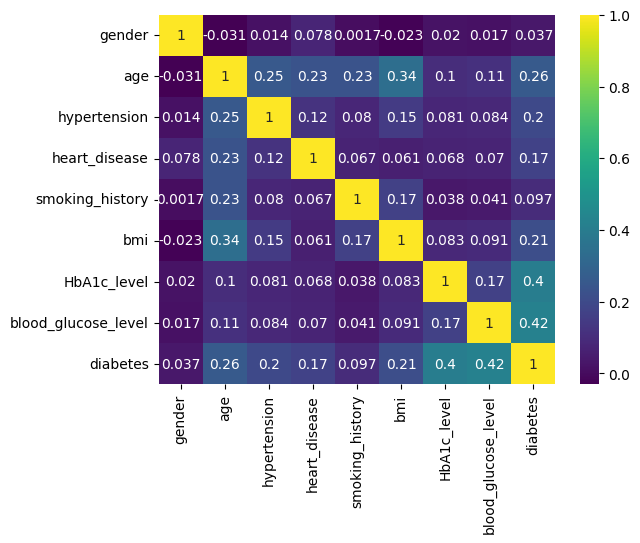

In [ ]:
cormat = Data.corr()
top_corr_features = cormat.index
g=sns.heatmap(Data[top_corr_features].corr(),annot=True,cmap="viridis")

### 1.3.2.. Distribution

In [ ]:
fig = px.pie(Data, 'diabetes',color_discrete_sequence=['#491d9b','#6f9b1d'],title='Data Distribution',template='plotly')

fig.show()

The data is not balanced

### 1.3.3. scatter

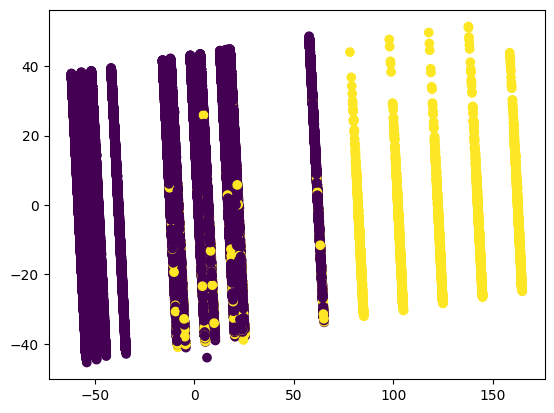

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pyp.scatter(X_pca[:, 0], X_pca[:, 1], c=Y)
pyp.show()

## 1.4. Split to train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("The shape of Training data:", X_train_res.shape, X_train_res.shape)
print("The shape of testing data:", X_test.shape, y_test.shape)

The shape of Training data: (128078, 8) (128078, 8)
The shape of testing data: (30000, 8) (30000,)


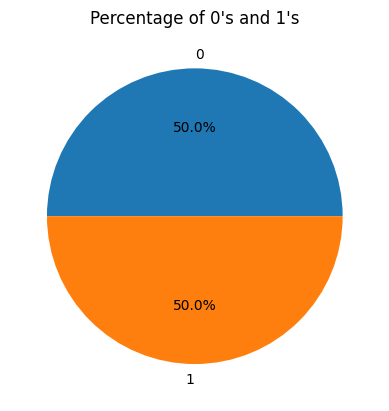

In [ ]:
unique, counts = np.unique(y_train_res, return_counts=True)
pyp.pie(counts, labels=unique, autopct='%1.1f%%')
pyp.title('Percentage of 0\'s and 1\'s')
pyp.show()